In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1900)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1900)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

710

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | antalaha
Processing Record 4 of Set 1 | tateyama
Processing Record 5 of Set 1 | zaysan
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | tanggu
Processing Record 8 of Set 1 | nome
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | lumut
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | bargal
City not found. Skipping...
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | quatre cocos
Processing Record 18 of Set 1 | praia
Processing Record 19 of Set 1 | ulladulla
Processing Record 20 of Set 1 | barsi
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23

Processing Record 37 of Set 4 | shimoda
Processing Record 38 of Set 4 | buraydah
Processing Record 39 of Set 4 | beloha
Processing Record 40 of Set 4 | thinadhoo
Processing Record 41 of Set 4 | nyzhnya duvanka
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | stanesti
Processing Record 44 of Set 4 | tawnat
City not found. Skipping...
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | jharsuguda
Processing Record 47 of Set 4 | bolshaya atnya
City not found. Skipping...
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | praya
Processing Record 50 of Set 4 | stamsund
City not found. Skipping...
Processing Record 1 of Set 5 | pando
Processing Record 2 of Set 5 | sinegorye
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | ughelli
Processing Record 5 of Set 5 | santiago del estero
Processing Record 6 of Set 5 | havelock
Processing Record 7 of Set 5 | bandiagara
Processing 

Processing Record 27 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 28 of Set 8 | bengkulu
Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | rio claro
Processing Record 31 of Set 8 | malwan
City not found. Skipping...
Processing Record 32 of Set 8 | coahuayana
Processing Record 33 of Set 8 | tiznit
Processing Record 34 of Set 8 | punta alta
Processing Record 35 of Set 8 | mbaiki
Processing Record 36 of Set 8 | pampas
Processing Record 37 of Set 8 | taunggyi
Processing Record 38 of Set 8 | coihueco
Processing Record 39 of Set 8 | berlevag
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | port-cartier
Processing Record 42 of Set 8 | westport
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | cotonou
Processing Record 47 of Set 8 | mahina
Processing Record 48 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 8 |

Processing Record 14 of Set 12 | tome
Processing Record 15 of Set 12 | elat
Processing Record 16 of Set 12 | marabba
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | grand centre
City not found. Skipping...
Processing Record 19 of Set 12 | sim
Processing Record 20 of Set 12 | beatrice
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | mount hagen
Processing Record 23 of Set 12 | lingao
Processing Record 24 of Set 12 | cabedelo
Processing Record 25 of Set 12 | tervel
Processing Record 26 of Set 12 | waingapu
Processing Record 27 of Set 12 | kamphaeng phet
Processing Record 28 of Set 12 | manoel urbano
Processing Record 29 of Set 12 | coos bay
Processing Record 30 of Set 12 | kununurra
Processing Record 31 of Set 12 | springdale
Processing Record 32 of Set 12 | madang
Processing Record 33 of Set 12 | safaqis
City not found. Skipping...
Processing Record 34 of Set 12 | zinacatepec
Processing Record 35 of Set 12 | kemijarvi
Processing Re

In [7]:
len(city_data)

648

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,40,0,18.41,CL,2021-10-05 21:03:42
1,Jamestown,42.0970,-79.2353,74.52,78,70,5.99,US,2021-10-05 20:59:57
2,Antalaha,-14.9003,50.2788,67.10,88,9,5.59,MG,2021-10-05 21:03:45
3,Tateyama,34.9833,139.8667,71.62,78,80,8.77,JP,2021-10-05 21:03:45
4,Zaysan,47.4667,84.8667,42.10,88,100,9.33,KZ,2021-10-05 21:03:46
5,Castro,-24.7911,-50.0119,63.41,86,92,7.43,BR,2021-10-05 21:00:44
6,Tanggu,39.0211,117.6469,51.76,86,100,15.23,CN,2021-10-05 21:03:46
7,Nome,64.5011,-165.4064,44.67,93,90,12.66,US,2021-10-05 21:03:39
8,Busselton,-33.6500,115.3333,37.04,74,60,4.76,AU,2021-10-05 21:03:47
9,Lumut,4.2323,100.6298,78.17,82,95,9.08,MY,2021-10-05 21:03:47


In [9]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-05 21:03:42,-53.1500,-70.9167,48.31,40,0,18.41
1,Jamestown,US,2021-10-05 20:59:57,42.0970,-79.2353,74.52,78,70,5.99
2,Antalaha,MG,2021-10-05 21:03:45,-14.9003,50.2788,67.10,88,9,5.59
3,Tateyama,JP,2021-10-05 21:03:45,34.9833,139.8667,71.62,78,80,8.77
4,Zaysan,KZ,2021-10-05 21:03:46,47.4667,84.8667,42.10,88,100,9.33
5,Castro,BR,2021-10-05 21:00:44,-24.7911,-50.0119,63.41,86,92,7.43
6,Tanggu,CN,2021-10-05 21:03:46,39.0211,117.6469,51.76,86,100,15.23
7,Nome,US,2021-10-05 21:03:39,64.5011,-165.4064,44.67,93,90,12.66
8,Busselton,AU,2021-10-05 21:03:47,-33.6500,115.3333,37.04,74,60,4.76
9,Lumut,MY,2021-10-05 21:03:47,4.2323,100.6298,78.17,82,95,9.08


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

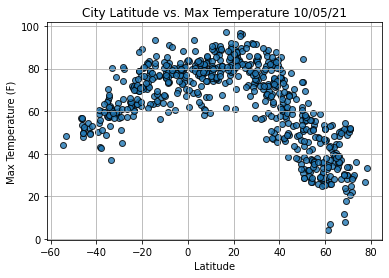

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Max_temp.png")

# Show plot.
plt.show()

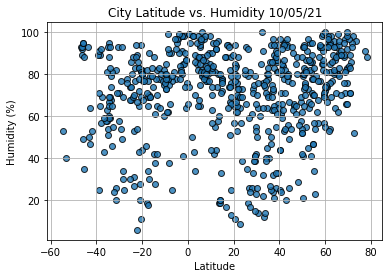

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Humidity.png")

# Show plot.
plt.show()

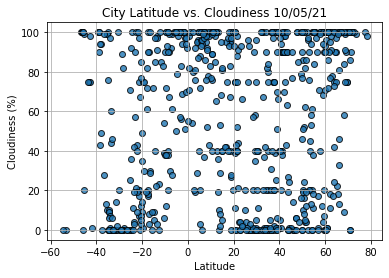

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Cloudiness.png")

# Show plot.
plt.show()

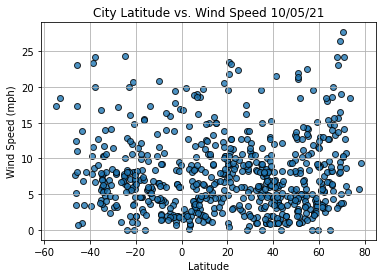

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Wind_Speed.png")

# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 
    print(f"R_value=  {r_value}")

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

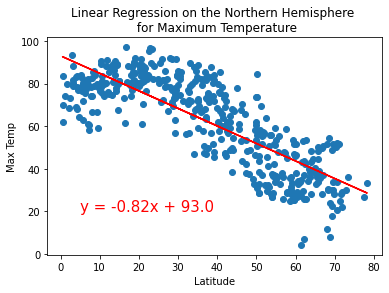

R_value=  -0.8057956708590638


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,20))

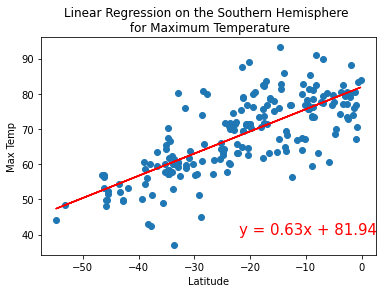

R_value=  0.7470844629581026


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-22,40))

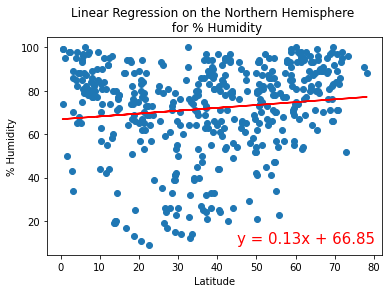

R_value=  0.12601239957072538


In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

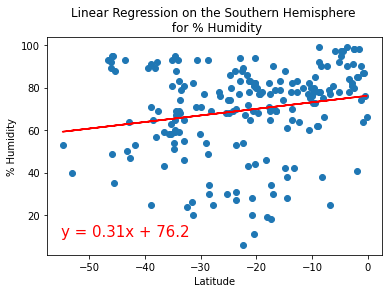

R_value=  0.19231410523379874


In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10))


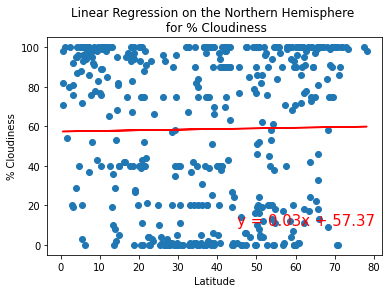

R_value=  0.01658261844361183


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

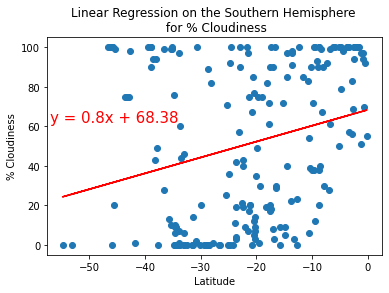

R_value=  0.2603487090938984


In [37]:
# Linear regression on the Sorthern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,62))

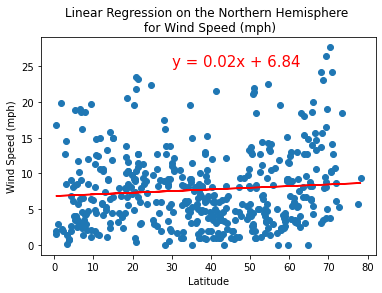

R_value=  0.08750977013039225


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)', 'Wind Speed (mph)',(30,25))

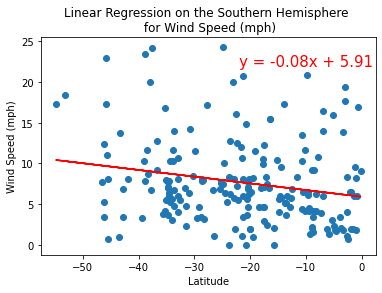

R_value=  -0.20689508578442833


In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)', 'Wind Speed (mph)',(-22,22))